# Categorical Support Vector Classifier

## Imports

In [1]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

## Loading the database

#### Read the csv file and study the database

In [2]:
raw = pd.read_csv("./mushrooms-full-dataset.csv", dtype=str)
raw = pd.DataFrame(raw)
raw.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
raw.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
raw.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [5]:
raw.shape

(8124, 22)

In [6]:
raw['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [7]:
raw['poisonous'].value_counts()
# p(poisonous) = beracun
# e(edible) = dapat dimakan
# lebih banyak yang dapat dimakan daripada beracun meski selisih sedikit

e    4208
p    3916
Name: poisonous, dtype: int64

In [8]:
raw.isnull().sum()
# tidak ada data yang kosong

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Preprocessing

#### Tentukan target dan input

In [9]:
X = raw.drop(['poisonous'], axis=1)
y = raw['poisonous']

#### Training dan testing

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=44, stratify=y)
# random_state = agar output saat menjalankan algoritma dengan parameter dan data yang sama hasilnya akan tetap sama
# stratify = untuk memastikan proporsi kelas yang seimbang, menghindari bias, setiap lipatan dalam validasi silang mempertahankan proporsi yang sama

#### Periksa hasil stratifikasi

In [11]:
y_train.value_counts(normalize=True)

e    0.517926
p    0.482074
Name: poisonous, dtype: float64

In [12]:
y_test.value_counts(normalize=True)
#terlihat kedua proporsi lebih banyak yang dapat dikonsumsi daripada yang beracun meski selisih hanya 3%

e    0.518154
p    0.481846
Name: poisonous, dtype: float64

#### Gunakan Encoder yang Berbeda untuk y dan X

In [13]:
encoder_ord = OrdinalEncoder()
encoder_lab = LabelEncoder()
# OrdinalEncoder() mengubah nilai kategori yang memiliki tingkatan menjadi data numerik
# LabelEncoder() mengubah variabel kategori menjadi bilangan bulat

#### Menerapkan fit_transform() pada training model dan transform() pada test model

In [14]:
x_train_transf = encoder_ord.fit_transform(x_train)
x_test_trasf = encoder_ord.fit_transform(x_test)

y_train_transf = encoder_lab.fit_transform(y_train)
y_test_trasf = encoder_lab.transform(y_test)

In [15]:
y_train_transf, x_train_transf

(array([1, 1, 0, ..., 0, 0, 1]),
 array([[2., 3., 0., ..., 5., 4., 1.],
        [5., 2., 4., ..., 7., 4., 2.],
        [2., 0., 4., ..., 2., 4., 0.],
        ...,
        [0., 3., 8., ..., 2., 2., 3.],
        [2., 2., 4., ..., 3., 0., 1.],
        [0., 3., 0., ..., 5., 4., 1.]]))

## Rescaling

Agar SVC berjalan dengan baik, input harus diskalakan di rentang -1 sampai 1

- menghindari dominasi atribut
- mempercepat konvergensi: ruang fitur menjadi lebih simetris, distribusi data lebih terpusat
- memperaiki performa: setiap atribut akan memberikan kontribusi yang seimbang dalam pembentukan hyperplane pemisah

In [16]:
# sebelum di scaling
x_train_transf

array([[2., 3., 0., ..., 5., 4., 1.],
       [5., 2., 4., ..., 7., 4., 2.],
       [2., 0., 4., ..., 2., 4., 0.],
       ...,
       [0., 3., 8., ..., 2., 2., 3.],
       [2., 2., 4., ..., 3., 0., 1.],
       [0., 3., 0., ..., 5., 4., 1.]])

In [17]:
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(x_train_transf)
x_train_transf_rescaled = scaling.transform(x_train_transf)

# sesudah di scaling
x_train_transf_rescaled

array([[-0.2       ,  1.        , -1.        , ...,  0.25      ,
         0.6       , -0.66666667],
       [ 1.        ,  0.33333333, -0.11111111, ...,  0.75      ,
         0.6       , -0.33333333],
       [-0.2       , -1.        , -0.11111111, ..., -0.5       ,
         0.6       , -1.        ],
       ...,
       [-1.        ,  1.        ,  0.77777778, ..., -0.5       ,
        -0.2       ,  0.        ],
       [-0.2       ,  0.33333333, -0.11111111, ..., -0.25      ,
        -1.        , -0.66666667],
       [-1.        ,  1.        , -1.        , ...,  0.25      ,
         0.6       , -0.66666667]])

## Klasifikasi

Memisahkan 2 kelas atau lebih

In [18]:
klas = 1.0
svc = svm.SVC(kernel='linear', C=klas).fit(x_train_transf_rescaled, y_train_transf)
svc

# dalam pengklasifikasian terdapat banyak metode yang digunakan, namun disini kita menggunakan metode kernel linear
# parameter C mengontrol sejauh mana model SVM mengizinkan adanya kesalahan klasfikasi pada training data

SVC(kernel='linear')

In [19]:
type(encoder_lab)

sklearn.preprocessing._label.LabelEncoder

In [20]:
# karena data telah di encode maka untuke mengakses kelas unique kita tidak dapat menggunakan type melainkan .classes_
encoder_lab.classes_

array(['e', 'p'], dtype=object)

## Evaluasi

Evlauasi model pada data test

In [21]:
y_pred_test = svc.predict(scaling.transform(x_test_trasf))
y_pred_test

# 'scaling.transform(x_test_trasf)' menormalkan menjadi rentang -1 sampai 1
# 'svc' menggunakan model svc yang sudah dilatih lalu memprediksi label kelas dari data uji yang sudah diskalakan
# 'predict' melakukan prediksi pada data uji yang diberikan 

array([1, 0, 0, ..., 1, 0, 0])

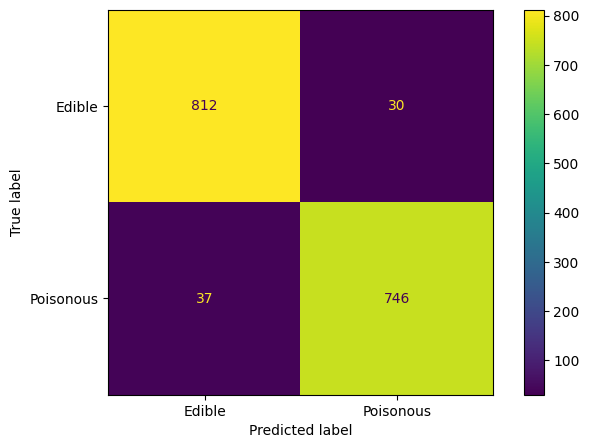

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
# 'fig' figure
# 'ax' axes objek yang digunakan untuk membuat plot di dalam figure

cmd = ConfusionMatrixDisplay(confusion_matrix(y_test_trasf, y_pred_test), display_labels=['Edible', 'Poisonous'])

cmd.plot(ax=ax)

In [72]:
# menghitung nilai akurasi model
# (true positive + true negative) / (true positve + true negative + false positive + false negative)
TP = 812
TN = 746
FP = 37
FN = 30

accuracy = (TP + TN) / (TP  + TN + FP + FN)
accuracy_percent = accuracy * 100
formatted_accuracy = "{:.1f}%".format(accuracy_percent)

print("Akurasi:", formatted_accuracy)

Akurasi: 95.9%


In [79]:
print(classification_report(y_test_trasf, y_pred_test, target_names=['Edible', 'Poisonous']))

              precision    recall  f1-score   support

      Edible       0.96      0.96      0.96       842
   Poisonous       0.96      0.95      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## Menentukan Hyperparameter dengan pendekatan GridSearchCV

Memilih kernel yang terbaik dan parameter C yang optimal berdasarkan Cross-Validation dari training data

In [82]:
# dalam prosses tunning disini kita menggunakan 3 hyperparameter untuk model yang berbeda
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [99]:
# daftar skor yang akan diefaluasi
scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_transf_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_trasf, clf.predict(scaling.transform(x_test_trasf))
    print(classification_report(y_true, y_pred))
    print()

# mengefaluasi nilai presisi dan recall dengan menentukan nilai hyperparameter yang optimal, sejalan dengan memperkecil nilai false positive dan false negative

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.960 (+/-0.001) for {'C': 1, 'kernel': 'linear'}
0.963 (+/-0.006) for {'C': 10, 'kernel': 'linear'}
0.999 (+/-0.003) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.927 (+/-0.007) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.894 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.949 (+/-0.005) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.927 (+/-0.007) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.

### Kesimpulan:
Model yang dilatih dengan kombinasi hyperparameter 'C': 10 dan 'kernel': 'poly' memberikan kinerja yang sangat baik dengan tingkat akurasi, presisi, dan recall yang sempurna pada data evaluasi. Model ini berhasil mengklasifikasikan kelas '0' dan '1' dengan sempurna, tanpa adanya kesalahan. Namun, penting untuk dicatat bahwa hasil ini didasarkan pada data evaluasi yang digunakan, dan kinerja sebenarnya pada data yang belum terlihat mungkin berbeda.